# Example 15.2.6: Periodic Functions (modified) 
This is an easy example of a function fulfilling those conditions that make it possible to apply the results of example 15.2.6. In the example the classical Wiener measure is used. This measure sofar is not implemented in this project, such that the results of of this section do not hold for these examples. Nevertheless, the results are compared with the results using the Lebesgue measure. If the use of the Wiener measure is implemented, the example easily could be modified. 

In example 15.2.6. in one dimension it is assumed that you have a r-times continuously differentiable function with period $\beta$. Then the norm of this space $F_1 = \tilde{C}^{r}([0,\beta])$ could be written as $$||f||_{F_1}=|f(0)| + \max_{t\in [0,\beta]}|f^{(r)}(t)|$$.

If we now assume $f^{(i)}(0)=f^{(i)}(\beta)=0$ for all $i \in 1, 2, \dots, r$, we have for the d dimensional case $$||f||_{F_d}=\max_{t\in [0,\beta]^{d}}|f^{(r,r,\dots,r)}(t)|$$. 

Using the information $N_i (f) = [f(\frac{\beta}{m_i+1}), f(\frac{2\cdot \beta}{m_i+1}), \dots, f(\frac{m_i\cdot \beta}{m_i+1})]$ we use the algorithm 
$$
U_i (f) = \frac{\beta}{m_i}\sum^{m_i}_{j_1} f\left(\frac{j\beta}{m_1 +1}\right)
$$
to approximate the integral. This coincides with the open trapezoidal quadrature. The rest of the properties of the approximation are explained afterwards. 

First we take a quick look at the function
$$
f_1(x,t) = \min(x,t), 
$$
which is in $\tilde{C}^{0}([0,1])$. It is possible to calculate that the 
$$
\int_{[0,1]^{2}} f_1(\vec{x}) d\vec{x} = \frac{1}{3}
$$
holds. The real cost of the reaching of a specific error is compared with the estimated cost in the rear part of the section. 

After this we take a look at some easy functions $\tilde{C}^{r-1}([0,1])$, with $r>0$. 

Here the one dimensional function we chose is 
$$
f_{r} (x)=\left(\prod^{\lfloor r/2\rfloor}_{k = 1} \frac{2k-1}{2k}\right) \cdot \sin^r(2\pi \cdot x), 
$$
which especially is in $\tilde{C}^{r-1}([0,1])$, with $f(0)=f(1)=1.$ The result of the integral $\int_{[0,1]^{d}}\prod^{d}_{k=1} 2 \cdot \sin^2(2\pi \cdot x_k)d\vec{x} $ could be determined analytically to be 1 for even $r$ and $d \in \mathbb{N}$ and 0 for uneven $r$ and $d \in \mathbb{N}$. 

In [1]:
import os
os.chdir("..")


import Methodes_Studienproject.Studienprojekt_Smolyak_qmc_one_point as Studieproject_one
import matplotlib.pyplot as plt
import pandas as bearcats
import scipy 
import sympy as sp
import numpy as np
import itertools as itt
import math 
from sklearn import datasets, linear_model
plt.rc('font', size=14, weight="bold")


## Example on page 358

First we show the calculate the approximation of $f_1 (x,t)$ and the approximation given on page 358.

In [11]:
from IPython.display import display, Math

# other properties of the example
r = 0
beta = 1
q = 2
dim = 2
m_i = 2 ** q - 1

# Specific error properties of periodic functions of this kind 
C_r = np.sqrt(abs(scipy.special.bernoulli(2+2*r)[-1])/math.factorial(2*r+2))
e_one_a =  C_r * beta ** ((2*r+3)/2)  
e_one_b = 2 ** (-(r + 1))

# Cost and error esimation for the one dimensional error
B, C, D, F_0, F = [e_one_a, e_one_a, e_one_b, 1, 2]

# calculation of the approximation and the error and cost estimation 
# of the example 
option = "Trapezoidal"
deg_approx = 18
def max_fun(x, t):
# implementation of the function given on page 358 for input like used in 
# implementation of algorithm.
    return np.min(np.array([x,t]), axis=0)

variables = []
for f in range(dim):
    variables.append(sp.Symbol("x_" + str(f)))

result_max_fun = np.empty((deg_approx,2))
cost_and_err_estim = np.empty((20,2))
for eps_ind, epsilon in enumerate([(1/2) ** (i+3) for i in range(20)]):
    m_i = 2 ** q - 1
    cost_and_err_estim[eps_ind,:] = Studieproject_one.fast_eps_cost(dim, B, C, D, F_0, F, epsilon)[0::6]
    
for q in range(dim, dim + deg_approx):
    result_max_fun[q-2, :] = Studieproject_one.controller_smolyak(max_fun, variables, option, q, function_given=True, no_error=True, example_2=True)[0:3:2]
    
result_max_fun[:,0] = abs(result_max_fun[:,0] -1/3) 

We here want to show that the function calculating the estimation works properly.

In [12]:
estim_cost_error =Studieproject_one.fast_eps_cost(dim, B, C, D, F_0, F, 1/8)
meaning =[r"cost(A_{\epsilon}(d))", r"\alpha", r"\alpha_0", r"\alpha_1", r"\alpha_2", r"\alpha_3"]

display(Math(r" $We chose $\epsilon"+r"$ = $ \frac{1}{8}"))
print("This leads to:")
for index, var in enumerate(meaning):
    display(Math(var+"$ = $" +str(round(estim_cost_error[index],4))))
    print("")
display(Math(" $This coincides with the values diplayed on the pages 368 and 369. For bigger values of  $ \epsilon, $ the cost-estimation is not a number. In this reagion the estimation will be seen to be bigger than actual values.$ "))

<IPython.core.display.Math object>

This leads to:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

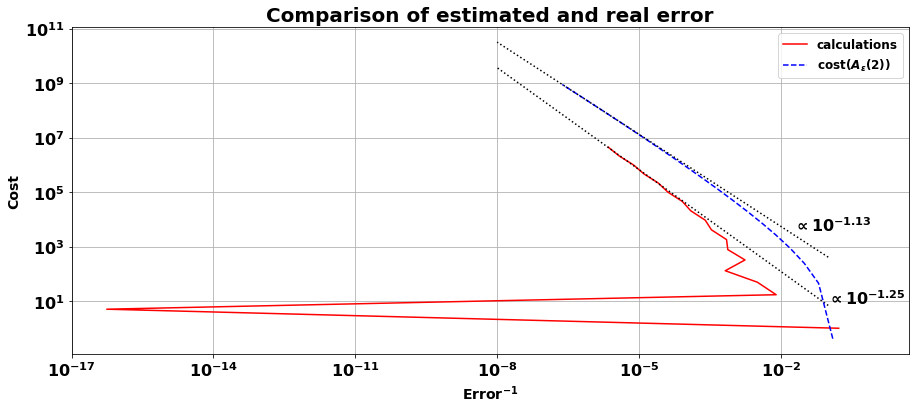

In [36]:
fig = plt.figure(figsize=(15,6))
plt.plot( abs(result_max_fun[:,0]), result_max_fun[:,1], color="red", label= "calculations")
regression_data_x = [[k_1] for k_1 in np.log(abs(result_max_fun[-5:,0]))]
regression_data_y = [[k_2] for k_2 in np.log(abs(result_max_fun[-5:,1]))]
regr = linear_model.LinearRegression()
regr.fit(regression_data_x , regression_data_y)
regr.score(regression_data_x , regression_data_y)
exponent = regr.coef_
        
regression_y = [np.e**(regr.intercept_ + exponent[0][0] * np.log(x)) for x in np.linspace(10**(-1),10**(-8),30)]
plt.plot(np.linspace(10**(-1),10**(-8),30),regression_y, "k:")
plt.annotate("$\propto 10^{-1.25}$", (np.linspace(10**(-1),10**(-8),30)[2],regression_y[1]),xytext=(np.linspace(10**(-1),10**(-8),30)[2],regression_y[1]*1.1), fontweight="bold",fontsize=16)

plt.plot( [(1/2) ** (i+3) for i in range(20)], cost_and_err_estim[:,0], color="blue", linestyle="--",label="cost($A_{\epsilon}(2)$)")
regression_data_x = [[k_1] for k_1 in np.log10([(2) ** (-i-3) for i in range(15,20)])]
regression_data_y = [[k_2] for k_2 in np.log10(cost_and_err_estim[-5:,0])]
regr = linear_model.LinearRegression()
regr.fit(regression_data_x , regression_data_y)
regr.score(regression_data_x , regression_data_y)
exponent = regr.coef_

regression_y = [10**(regr.intercept_ + exponent[0][0] * np.log10(x)) for x in np.linspace(10**(-1),10**(-8),30)]
plt.plot(np.linspace(10**(-1),10**(-8),30),regression_y, "k:")
plt.annotate("$\propto 10^{-1.13}$", (np.linspace(10**(-1),10**(-8),30)[25],regression_y[25]),xytext=(np.linspace(10**(-1),10**(-8),30)[25]*1.3,regression_y[25]), fontweight="bold",fontsize=16)

plt.xlim(10**(-17), 5)
plt.yscale("log")
plt.xscale("log")
plt.grid(axis="both")
plt.legend(fontsize=12)
plt.ylabel("Cost", fontsize = 14,fontweight = "bold")
plt.xlabel(r"Error$^{-1}$",fontsize = 14,fontweight = "bold")
plt.yticks(fontsize=16,fontweight="bold")
plt.xticks(fontsize=16,fontweight="bold")
plt.title("Comparison of estimated and real error",
          fontsize = 20, fontweight = "bold")     
plt.show()

The error scales in a surprisingly nice way, such that the error bound holds for the function $f_1(\vec{x})$ for almost every point. We once again remind the reader that the error bound could not be applied to the calculation without changing the measure used in this project.

## Example 2: Functions in $f \in \tilde{C}^r([0,1])$ with $r > 0$ and higher dimensions

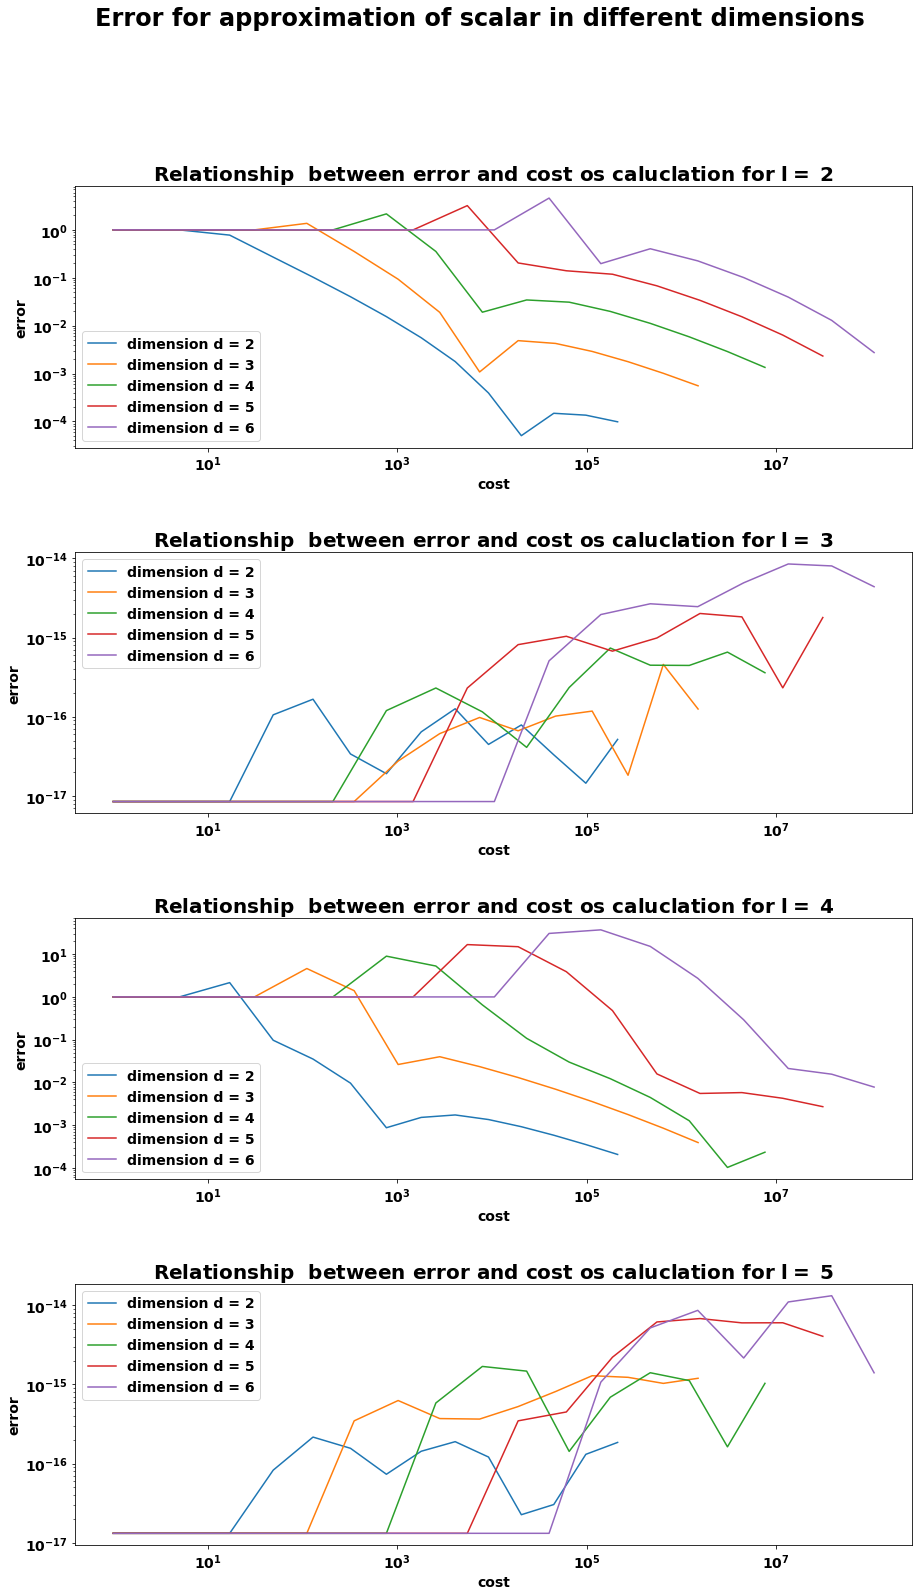

In [6]:
# We from now on use l instead of r to make clear that the sofar the results of section 15.2.6 could not be applied.

beta = 1


try:
    os.chdir("Data")
except:
    pass

color_str = ["navy", "crimson", "forestgreen", "cornflowerblue", "darkorange"]

# Structure of data: [r, dim,q,:]
result_per_func = bearcats.read_pickle("approx_per_function.pkl")
result_per_func = result_per_func['results']#[:-1,:,:,:]

fig, ax = plt.subplots(result_per_func.shape[0],figsize=(15,25))


for l in range(result_per_func.shape[0]):
    result_per_func_l = result_per_func[l,:,:,:]
    l_real = 0
    
    ''' These calculations are not made because the estimations are not met. 
    In further implementation it might be possible to use them
    
    
    # Specific error properties of periodic functions of this kind 
    C_r = np.sqrt(abs(scipy.special.bernoulli(2+2*r_real)[-1])/math.factorial(2*r_real+2))
    e_one_a =  C_r * beta ** ((2*r_real+3)/2)  
    e_one_b = 2 ** (-(r_real + 1))

    # Cost and error esimation for the one dimensional error
    B, C, D, F_0, F = [e_one_a, e_one_a, e_one_b, 1, 2]
    ''' 
    
    for dim in range(result_per_func_l.shape[0]):
        dim_real = dim+2
        # We want to take a look at the error, not the value of the approximation.
        if l%2==0:
            error = abs(result_per_func_l[dim,:,0]-1)
        else:
             error = abs(result_per_func_l[dim,:,0])+np.max(abs(result_per_func_l[:,:,0]))/1000

        cost  = result_per_func_l[dim,:,2]
        
        '''
        cost_estim = []
        epsilons = [(1/2)**(20*l+k_1) for k_1 in range(error.shape[0])]
        for eps in epsilons:
            cost_estim.append(Studieproject_one.fast_eps_cost(dim_real, B, C, D, F_0, F, eps)[0])
        '''
        
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        ax[l].plot(cost, error, label="dimension d = "+ str(dim+2))

    ax[l].set_xscale("log")
    ax[l].set_yscale("log")
    ax[l].legend()
    ax[l].set_title(r"Relationship  between error and cost os caluclation for $\mathbf{l} = $ " + str(l+2),fontsize=20, fontweight="bold")
    ax[l].set_xlabel("cost",fontsize=14, fontweight="bold")
    ax[l].set_ylabel("error",fontsize=14, fontweight="bold")

fig.suptitle("Error for approximation of scalar in different dimensions", fontsize=24,fontweight="bold")

plt.show()
   

For l odd the results were shifted, because for small $q$ the error is 0. Because of the symmetry of the function and the points used for the calculation the only source of an inexact approximation is the machine error. 

For l even it could easily be seen that the results of section 15.2.6 could not be applied, because the the approximation would need to  have the tendency to get more precise with increasing $r$. This could not be observed. 

In [2]:
'''
option = "Trapezoidal"
deg_approx = 15
max_dim = 6
r_max = 5

results_example_2= np.empty((r_max-1 , max_dim-1, deg_approx, 3))
for r in range(2, r_max+1):
    print("  ")
    norm_factor = 1
    variables = ["(x_1)"]
    for k in range(1,int(np.ceil(r/2))+1):
        norm_factor = norm_factor * (2*k/(2*k-1))        

    functions = [str(norm_factor) + " sin(x_"+str(1)+"*2*pi)** "+str(r)]
   
    

    for dim in range(2,max_dim+1):

        variables.append(variables[-1][:-1]+", x_"+ str(dim)+")")
        functions.append(functions[-1]+  " * " + str(norm_factor) + "* sin(x_"+str(dim)+"*2*pi)** " + str(r))

        for q in range(dim,dim+deg_approx):
            print(str(r) + "  " +str(dim)+ "   " + str(q))
            results_example_2[r-2,dim-2, q - dim, :] = Studieproject_one.controller_smolyak(functions[-1], variables[-1], option, q, example_2=True)

            
results_example_2 = { "results": results_example_2}
   
bearcats.to_pickle(results_example_2,"approx_per_function.pkl")

print("If you want to generate data, remove quotation marks.")
'''
print("Remove quotes to generate data.")

Remove quotes to generate data.
